In [86]:
from DeepLearnFuncs import *
funcs = DeepLearnFuncs()
import six.moves.cPickle as cPickle

import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (16, 10)

... loading data
        lesion_id nmenh_dist nmenh_intenh
count        8884       8884         8884
unique        500          6            4
top           576        N/A          N/A
freq           25       4150         8182
[(u'Ductal', 0), (u'Focal', 1), (u'Linear', 2), (u'N/A', 3), (u'Regional', 4), (u'Segmental', 5)]
Removing incomplete patches...
[505, 951, 1467, 1818, 2040, 3220, 3789, 4112, 4924, 5068, 6067, 8838]


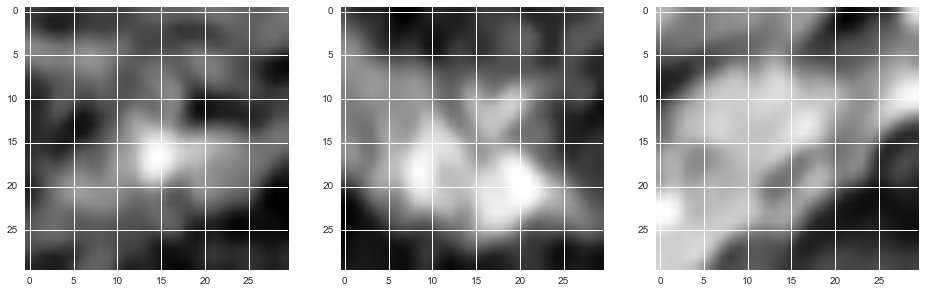

Number of patches: 5236 train, 1810 valid, 1826 test
... building a LogReg model
... training the model n_train_batches = 290
epoch 1, minibatch 290/290, validation error 56.388889 %
epoch 1, minibatch 290/290, test error of best model 48.844884 %
epoch 2, minibatch 290/290, validation error 56.388889 %
epoch 3, minibatch 290/290, validation error 56.388889 %
epoch 4, minibatch 290/290, validation error 56.388889 %
epoch 5, minibatch 290/290, validation error 56.388889 %
epoch 6, minibatch 290/290, validation error 56.388889 %
epoch 7, minibatch 290/290, validation error 56.388889 %
epoch 8, minibatch 290/290, validation error 56.388889 %
epoch 9, minibatch 290/290, validation error 56.388889 %
epoch 10, minibatch 290/290, validation error 56.388889 %
epoch 11, minibatch 290/290, validation error 56.388889 %
epoch 12, minibatch 290/290, validation error 56.333333 %
epoch 12, minibatch 290/290, test error of best model 49.394939 %
epoch 13, minibatch 290/290, validation error 56.333333 

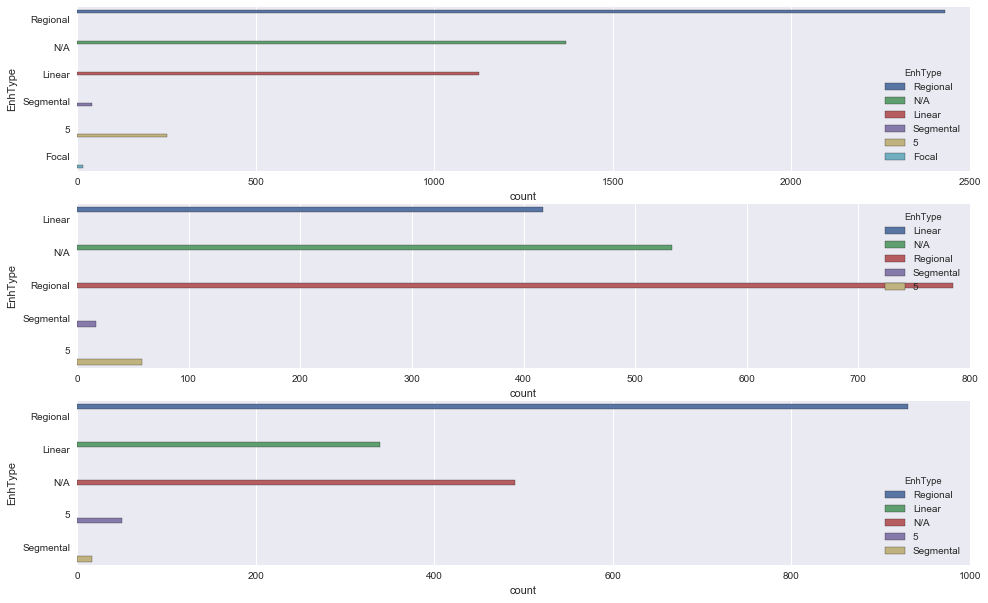

In [87]:
learning_rate=0.0005
n_epochs=5000
batch_size=18
dfLLdata = funcs.sgd_optimization(learning_rate, n_epochs, batch_size)

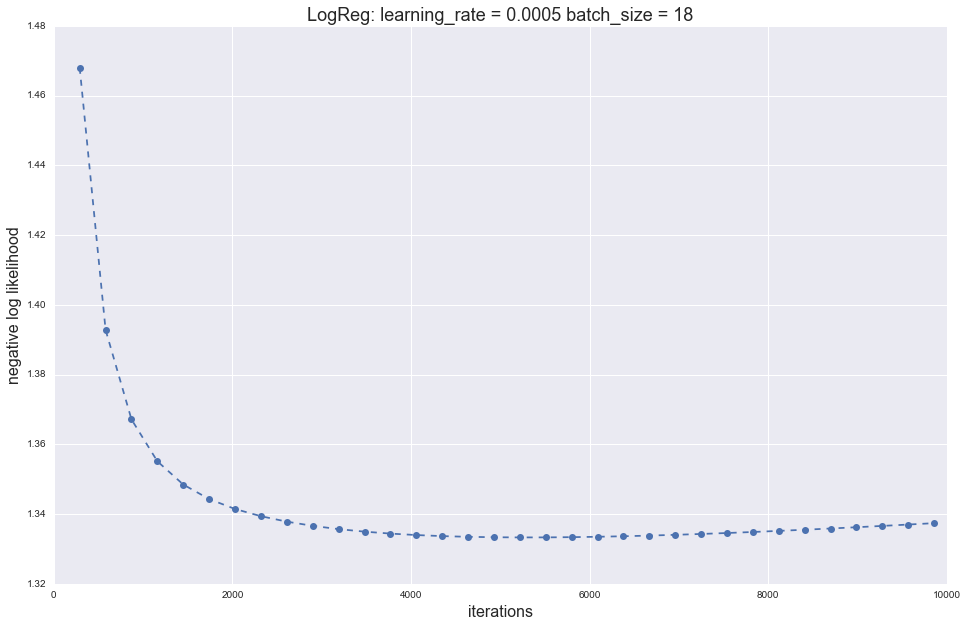

In [88]:
############
### plotting likelihood or cost
### the cost we minimize during training is the negative log likelihood of
############
x = dfLLdata['iter'].values
y = dfLLdata['LL_iter'].values
plt.figure()
plt.plot(x, y, 'bo--')
plt.xlabel('iterations', fontsize=16)
plt.ylabel('negative log likelihood', fontsize=16)
plt.title('LogReg: learning_rate = '+str(learning_rate)+' batch_size = '+str(batch_size), fontsize=18)


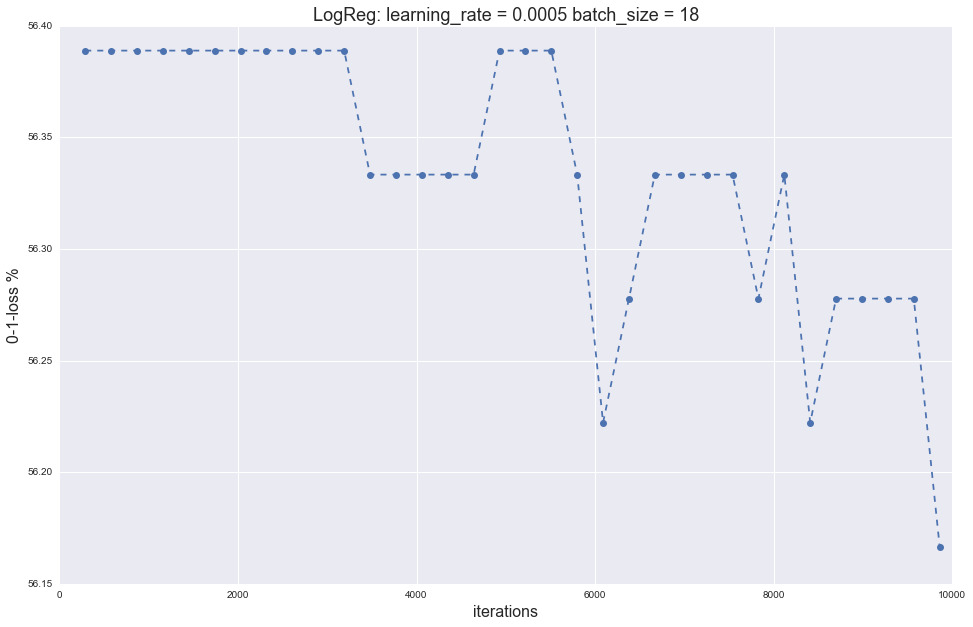

In [89]:
############
### plotting likelihood or cost
############     
x = dfLLdata['iter'].values
y = dfLLdata['0-1-loss'].values
plt.figure()
plt.plot(x, y, 'bo--')
plt.xlabel('iterations', fontsize=16)
plt.ylabel('0-1-loss %', fontsize=16)
plt.title('LogReg: learning_rate = '+str(learning_rate)+' batch_size = '+str(batch_size),  fontsize=18)

Predicted/Labels values for the first 10 examples in test set:
[3 3 3 3 3]
[3, 3, 3, 3, 3]


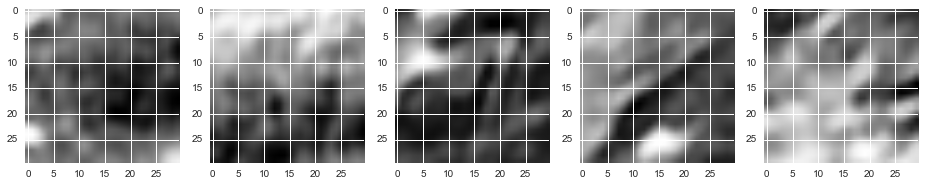

In [90]:
############
# load the saved model 
############
classifier = cPickle.load(open('best_model.pkl'))

# compile a predictor function 
predict_model = theano.function( inputs=[classifier.input], outputs=classifier.y_pred)

# We can test it on some examples from test test 
test_set = cPickle.load(open('test_set.pkl'))
test_set_x, test_set_y = test_set 
test_set_x = test_set_x.get_value() 

# We can test it on some examples from test test 
test_labels = cPickle.load(open('test_labels.pkl'))

predicted_values = predict_model(test_set_x[13:18]) 
print ("Predicted/Labels values for the first 10 examples in test set:") 
print predicted_values
print test_labels[13:18]

fig, ax = plt.subplots(ncols=5, nrows=1)
c=0
for k in range(13,18):
    img = np.reshape(test_set_x[k],(30,30))    
    ax[c].imshow(img, cmap="Greys_r")
    c+=1
plt.show()



# best validation score of 56.166667 %,with test performance 50.165017 %